In [ ]:
"""Modified by HE WEI Oct 27,2017"""
import requests
from requests.auth import  HTTPBasicAuth
import getpass

CLIENT_ID = "W9WTc7PRZNE8tA"
CLIENT_SECRET = "06l0-nWSDlOzDkvtCDWJm5Z0i7w"
USER_AGENT="python:datamining10 (by /u/erichhhhho)"

USERNAME="erichhhhho"
PASSWORD='<Use your own Key pls>'

def login(username, password):
    if password is None:
        password = getpass.getpass("Enter reddit password for user {}:".format(username))
    
    headers = {"User-Agent": USER_AGENT}
    client_auth = HTTPBasicAuth(CLIENT_ID, CLIENT_SECRET)
    post_data = {"grant_type": "password", "username": username,"password": password}
    response = requests.post("https://www.reddit.com/api/v1/access_token", auth=client_auth, data=post_data, headers=headers)
    return response.json()

token = login(USERNAME, PASSWORD)
print(token)

subreddit = "worldnews"
url = "https://oauth.reddit.com/r/{}".format(subreddit)
print(url)
headers = {"Authorization": "bearer {}".format(token['access_token']),"User-Agent": USER_AGENT}
response = requests.get(url, headers=headers)
print(response)
result=response.json()
print(type(result))


for story in result['data']['children']:
    print(story['data']['title'])

{'token_type': 'bearer', 'scope': '*', 'access_token': '49knjP4BG4h0ZvsFDahy7wqOEH4', 'expires_in': 3600}
https://oauth.reddit.com/r/worldnews
<Response [200]>
<class 'dict'>
World's witnessing a new Gilded Age as billionaires’ wealth swells to $6tn - The world’s super-rich hold the greatest concentration of wealth since the US Gilded Age at the turn of the 20th century, when families like the Carnegies, Rockefellers and Vanderbilts controlled vast fortunes.
Monsanto Attacks Scientists After Studies Show Trouble For Its New Weedkiller
Shipping executive: ‘We have deliberately misled public on climate’
As olive harvest begins, settlers flood Palestinian trees with sewage
Twitter is banning all ads from Russian news agencies RT and Sputnik effective immediately
Saudi Arabia criticized for giving robot citizenship, as it restricts women's rights
Australian Deputy Prime Minister Disqualified
Assad regime responsible for deadly sarin gas attack
Israeli wins gold at Abu Dhabi Judo tourney, w

In [2]:
from time import sleep

def get_links(subreddit, token, n_pages=5):
    
    print(token,subreddit)
    stories = []
    after = None
    for page_number in range(n_pages):
        result={}
        url = "https://oauth.reddit.com/r/{}limit=100".format(subreddit)
        headers = {"Authorization": "bearer {}".format(token['access_token']),"User-Agent": USER_AGENT}
        
        if after:
            url += "&after={}".format(after)
        response = requests.get(url, headers=headers)
        # print(type(response))
        # print(response)
        result = response.json()
        
        for story in result['data']['children']:
            print(story['data']['title'])
        after = result['data']['after']
        sleep(2)
        
        stories.extend([(story['data']['title'], story['data']['url'],story['data']['score']) for story in result['data']['children']])
    
    return stories
    
stories = get_links("china?", token)
print(stories)

{'token_type': 'bearer', 'scope': '*', 'access_token': '49knjP4BG4h0ZvsFDahy7wqOEH4', 'expires_in': 3600} china?
Weekly /r/China Discussion Thread - October 23, 2017
Post Again| I am a Chinese
Soaking in the RMB!
Sichuan Farmer complained to company after he washed his vegetables in a washing machine
China's Communist party has come of age--the west should wake up. By Richard McGregor.
Smog returns to Beijing with a vengeance. Roads forced to close.
Kuaidi even assists in eating your food
Professional League of Legends player beats girlfriend on live stream
Xi Jinping Thought to be taught in China's universities | World news
The look says it all
Banks often serve large companies; they don’t have the ability to serve small and medium-sized enterprises (SMEs) well
What Manchu resources. Books, audiovisual foremost, but also curious about presential classes or tutors, if only for reference
Has Beijing not hid red alert levels yet?
Trump on Xi: 'Now Some People Might Call Him the King'
"Ye

How Chinese scientists used a supercomputer to solve the ancient puzzle called the Three Body Problem
It's party congress time for the People's Republic and Dada Xi is illustrating his vision of China. Here is ours.
Over my dead body. Gimme waaaayyyyyyy
Another coin-tossing passenger causes flight chaos in China
When you find yourself agreeing with GW Bush
How Do I send a link to my QQ File Hub
Request. Does anybody have a link to an English translation for the whole of Xi Jinping's recent speech?
Chinese food health and safety. (vpn)
Can somebody help me to identify a Chinese song?
Five Reasons to Hate China
Who wants the boy child more in China's 1 child family, the mother or the father?
Getting a wisdom tooth removed at a Chinese public hospital a few days ago. Notice my clenched fists. Never felt so much pain in my life.
Twitch streaming in China
Study: Pollution kills 9 million a year, costs $4.6 trillion
Woe is Me TEFL China Experience
The gift that keeps on giving
Which of these

WeChat got a VPN Server blacklist
A video of a performance match of the 2017 Chinese University student Kong Fu Tournament
China, China, China, China: US President Donald Trump to visit Beijing in November
What will North Korea do for the opening of China’s big government meeting?
How to Make a Viral WeChat Post
I &lt;3 China.
Need help, being evicted on the 19th October
1 minute in Zhangjiajie National Forest Park 张家界 (Avatar inspiration)
can you suggest some neutrality overseas news website about Chinese economics and politics?
19h congress meeting, what is happening?
HK Right of Abode
China offers to buy 5 percent of Saudi Aramco directly
Please help me find the name of this Chinese cough medicine!
[Video] China and Hong Kong - Drone Flyover
Five Adventurous Activities In Qingdao
Living with Reverse Culture Shock, What Happens When You Leave China.
Is there a way to handwrite Chinese in Windows 10?
Wanna go to the mall in Xinjiang? You'll need to show ID. (中文)
School of Dumplings?
C

In [3]:
import os
import hashlib

data_folder = os.path.abspath('../Data/websites/raw')
number_errors = 0
for title, url, score in stories:
    print(type(url))
    output_filename = hashlib.md5(url.encode()).hexdigest()
    fullpath = os.path.join(data_folder, output_filename + ".txt")
    print(fullpath)
    try:
        response = requests.get(url)
        data = response.text
        with open(fullpath, 'w',encoding='utf-8') as outf:
            print('writing')
            outf.write(data)
    except Exception as e:      
        number_errors += 1
        print(e)



<class 'str'>
F:\Desktop\Learning-Data-Mining-with-Python\Data\websites\raw\22158005fcd1933170f0b44791369e1b.txt
writing
<class 'str'>
F:\Desktop\Learning-Data-Mining-with-Python\Data\websites\raw\6e7165f28c9586fbc363b23a73af6f3b.txt
writing
<class 'str'>
F:\Desktop\Learning-Data-Mining-with-Python\Data\websites\raw\890c3974d379d0527d4cc0acca32821d.txt
writing
<class 'str'>
F:\Desktop\Learning-Data-Mining-with-Python\Data\websites\raw\d91d1ecea2ff489194a546413e856167.txt
writing
<class 'str'>
F:\Desktop\Learning-Data-Mining-with-Python\Data\websites\raw\aba1a172195103751bb899cf9012f054.txt
writing
<class 'str'>
F:\Desktop\Learning-Data-Mining-with-Python\Data\websites\raw\1d81d40c731a66199829110a86453d3c.txt
writing
<class 'str'>
F:\Desktop\Learning-Data-Mining-with-Python\Data\websites\raw\0e063e2667997fd784fe6cee965b92e7.txt
writing
<class 'str'>
F:\Desktop\Learning-Data-Mining-with-Python\Data\websites\raw\20f5621a1648eee81ff4f291e977606d.txt
writing
<class 'str'>
F:\Desktop\Learnin

KeyboardInterrupt: 

In [4]:
import lxml
import lxml.html as LH
from lxml import etree



data_folder = os.path.abspath('../Data/websites/raw')
filenames = [os.path.join(data_folder, filename) for filename in os.listdir(data_folder)]

print(data_folder)
text_output_folder = os.path.abspath('../Data/websites/textonly')
print(text_output_folder)
print( lxml.etree.Comment)
skip_node_types = ["script", "head", "style", lxml.etree.Comment]



def get_text_from_file(filename):
    with open(filename,encoding='utf-8') as inf:
        html_tree = LH.parse(inf)
    #print(html_tree.getroot())
    return get_text_from_node(html_tree.getroot())

def get_text_from_node(node):
    if node == None:
        return ""
    if len(node) == 0:
    # No children, just return text from this item
        if node.text and len(node.text) > 100:
            return node.text
        else:
            return ""
    results = (get_text_from_node(child) for child in node if child.tag not in skip_node_types)
    return "\n".join(r for r in results if len(r) > 1)

for filename in os.listdir(data_folder):
    text = get_text_from_file(os.path.join(data_folder, filename))
    with open(os.path.join(text_output_folder, filename), 'w',encoding='utf-8') as outf:
        outf.write(text)

F:\Desktop\Learning-Data-Mining-with-Python\Data\websites\raw
F:\Desktop\Learning-Data-Mining-with-Python\Data\websites\textonly
<cyfunction Comment at 0x000000B4094EC048>


In [5]:
import os
import numpy as np
#data_folder = os.path.join(os.path.expanduser("~"), "Data", "websites", "textonly")
data_folder=text_output_folder
documents = [open(os.path.join(data_folder, filename),encoding='utf-8').read() for filename in os.listdir(data_folder)]
len(documents)

499

In [6]:
print([document[:100] for document in documents[:5]])

["we're sorry, but you appear to be a bot and we've seen too many requests\nfrom you lately. we enforce", '© Flypast of the Chengdu J-20 during the opening of Airshow China in Zhuhai (Imate credit: Alert5/Wi', "we're sorry, but you appear to be a bot and we've seen too many requests\nfrom you lately. we enforce", 'A new study of China’s one-child policy is roiling demography, sparking calls for the field’s leadin', 'Airbnb sees huge opportunities in China, and it’s investing its time and resources accordingly. But ']


In [7]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
from sklearn.pipeline import Pipeline

n_clusters = 10

pipeline = Pipeline([('feature_extraction', TfidfVectorizer(max_df=0.4)),
                     ('clusterer', KMeans(n_clusters=n_clusters))
                     ])

In [9]:
pipeline.fit(documents)

Pipeline(memory=None,
     steps=[('feature_extraction', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.4, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smoot...0, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [10]:
labels = pipeline.predict(documents)

In [11]:
from collections import Counter
c = Counter(labels)
for cluster_number in range(n_clusters):
    print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))

Cluster 0 contains 1 samples
Cluster 1 contains 139 samples
Cluster 2 contains 299 samples
Cluster 3 contains 22 samples
Cluster 4 contains 5 samples
Cluster 5 contains 2 samples
Cluster 6 contains 6 samples
Cluster 7 contains 2 samples
Cluster 8 contains 3 samples
Cluster 9 contains 20 samples


In [12]:
c[0]

1

In [13]:
pipeline.named_steps['clusterer'].inertia_

240.3414911351996

In [15]:
inertia_scores = []
n_cluster_values = list(range(2, 20))
for n_clusters in n_cluster_values:
    cur_inertia_scores = []
    print('n-clusters',n_clusters)
    X = TfidfVectorizer(max_df=0.4).fit_transform(documents)
    for i in range(30):
        km = KMeans(n_clusters=n_clusters).fit(X)
        cur_inertia_scores.append(km.inertia_)
    inertia_scores.append(cur_inertia_scores)
    print(inertia_scores)
inertia_scores = np.array(inertia_scores)

n-clusters 2
[[282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275]]
n-clusters 3
[[282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 

[[282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275], [263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 273.0996809716935, 263.55578493587336, 272.91166082596146, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.555

[[282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275], [263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 273.0996809716935, 263.55578493587336, 272.91166082596146, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.555

[[282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275], [263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 273.0996809716935, 263.55578493587336, 272.91166082596146, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.555

[[282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275], [263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 273.0996809716935, 263.55578493587336, 272.91166082596146, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.555

[[282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275], [263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 273.0996809716935, 263.55578493587336, 272.91166082596146, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.555

[[282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275], [263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 273.0996809716935, 263.55578493587336, 272.91166082596146, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.555

[[282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275], [263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 273.0996809716935, 263.55578493587336, 272.91166082596146, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.555

[[282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275, 282.2701138126275], [263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 273.0996809716935, 263.55578493587336, 272.91166082596146, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.55578493587336, 263.555

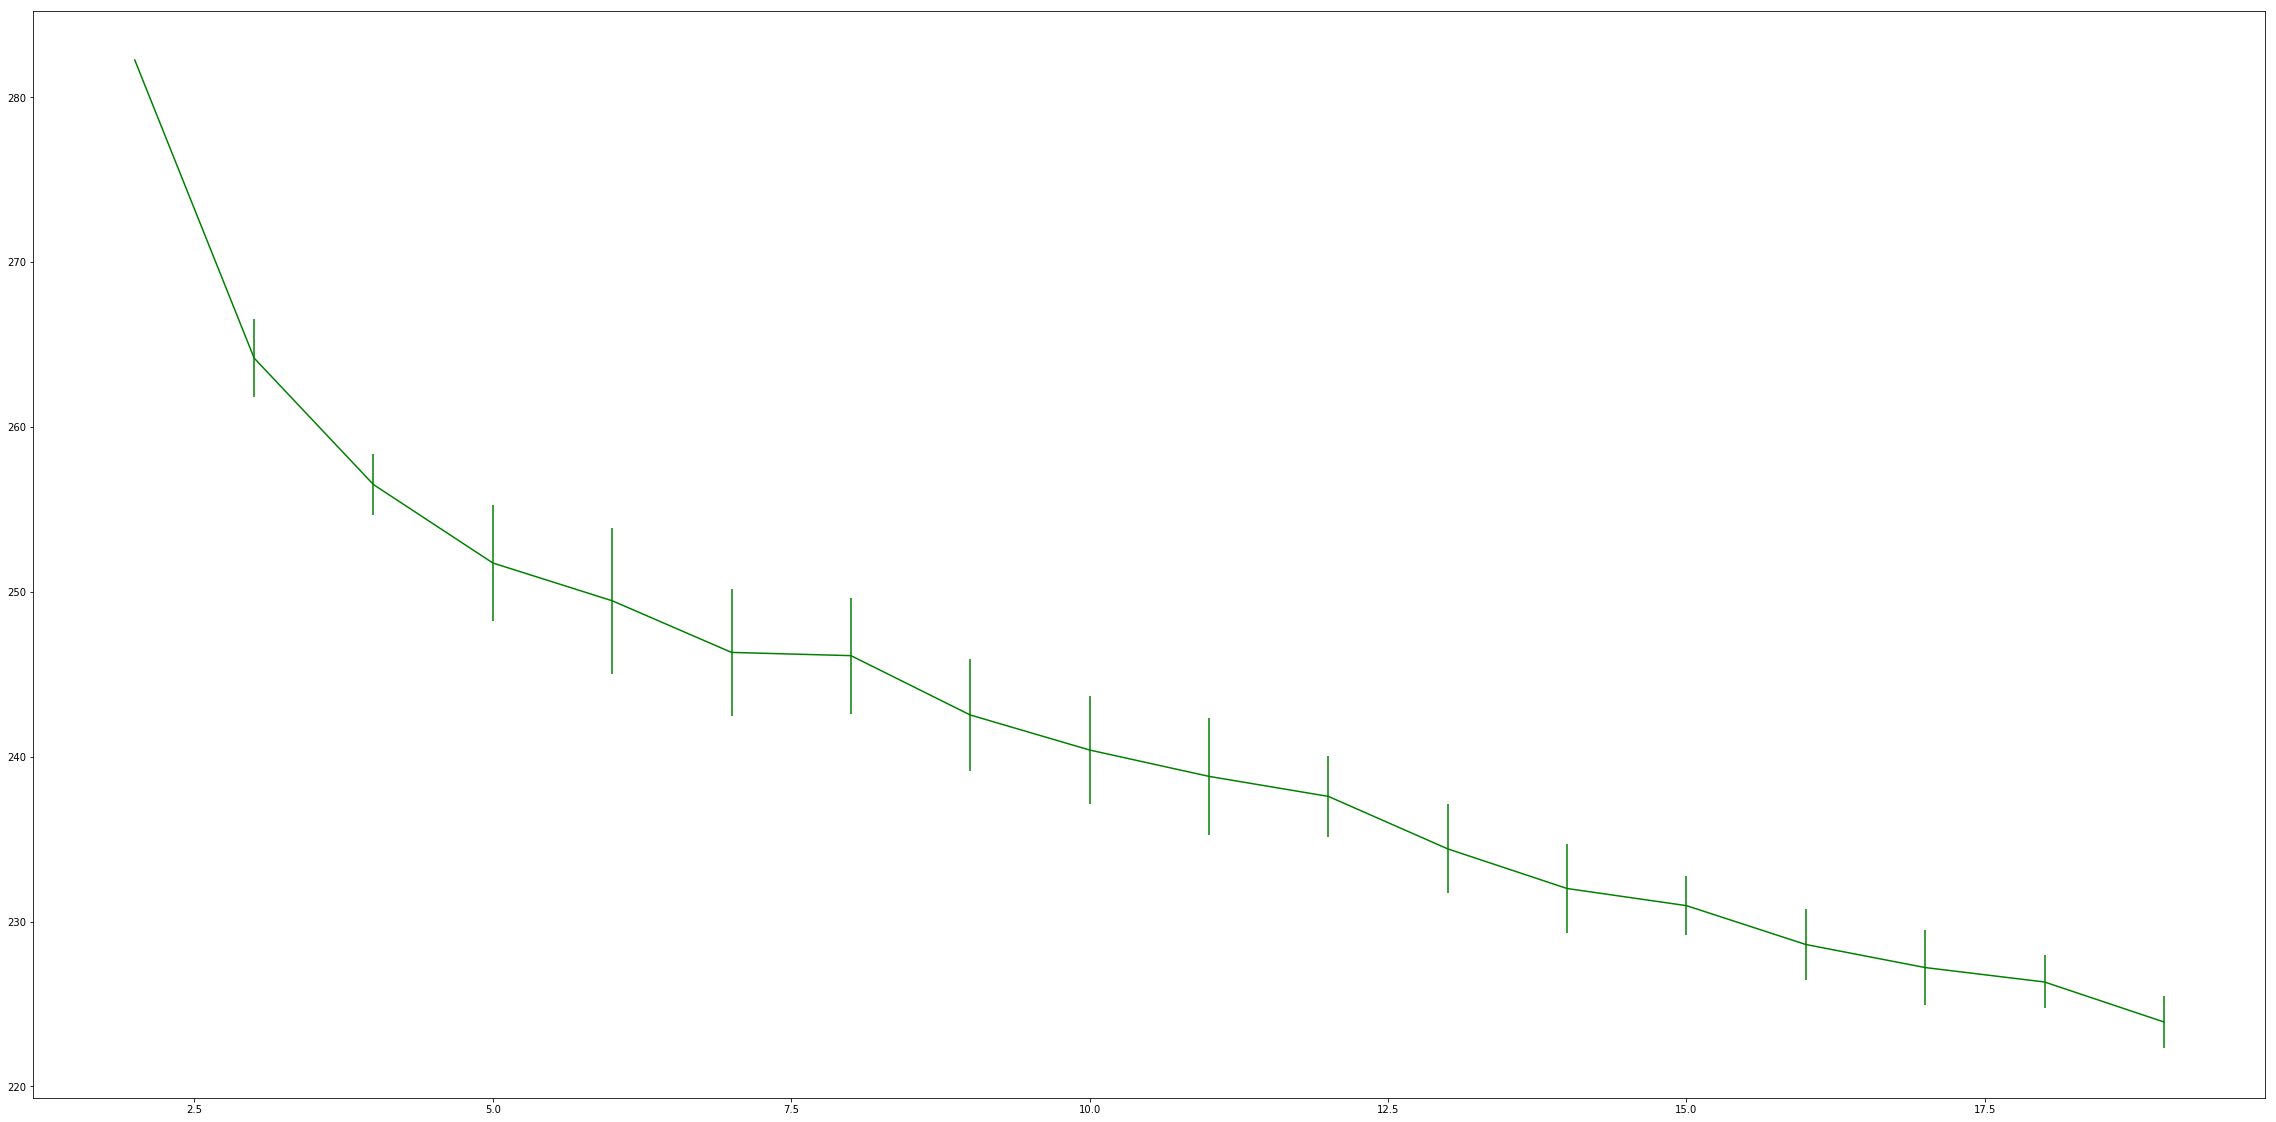

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

inertia_means = np.mean(inertia_scores, axis=1)
inertia_stderr = np.std(inertia_scores, axis=1)

fig = plt.figure(figsize=(40,20))
plt.errorbar(n_cluster_values, inertia_means, inertia_stderr, color='green')
plt.show()

In [17]:
n_clusters = 6

pipeline = Pipeline([('feature_extraction', TfidfVectorizer(max_df=0.4)),
                     ('clusterer', KMeans(n_clusters=n_clusters))
                     ])
pipeline.fit(documents)

Pipeline(memory=None,
     steps=[('feature_extraction', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.4, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smoot...6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [18]:
labels = pipeline.predict(documents)

In [19]:
c = Counter(labels)

terms = pipeline.named_steps['feature_extraction'].get_feature_names()

for cluster_number in range(n_clusters):
    print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))
    print("  Most important terms")
    centroid = pipeline.named_steps['clusterer'].cluster_centers_[cluster_number]
    most_important = centroid.argsort()
    for i in range(5):
        term_index = most_important[-(i+1)]
        print("  {0}) {1} (score: {2:.4f})".format(i+1, terms[term_index], centroid[term_index]))
    print()

Cluster 0 contains 139 samples
  Most important terms
  1) bot (score: 0.3156)
  2) requests (score: 0.3137)
  3) string (score: 0.3127)
  4) agent (score: 0.3089)
  5) user (score: 0.3052)

Cluster 1 contains 12 samples
  Most important terms
  1) business (score: 0.0837)
  2) missile (score: 0.0685)
  3) has (score: 0.0609)
  4) information (score: 0.0585)
  5) korea (score: 0.0551)

Cluster 2 contains 220 samples
  Most important terms
  1) they (score: 0.0247)
  2) was (score: 0.0226)
  3) said (score: 0.0215)
  4) ï¼ (score: 0.0208)
  5) he (score: 0.0199)

Cluster 3 contains 20 samples
  Most important terms
  1) ½ï (score: 0.9688)
  2) ½xyz (score: 0.0234)
  3) ½yï (score: 0.0156)
  4) desc (score: 0.0156)
  5) appl (score: 0.0156)

Cluster 4 contains 70 samples
  Most important terms
  1) xi (score: 0.1873)
  2) party (score: 0.1660)
  3) his (score: 0.0848)
  4) he (score: 0.0789)
  5) has (score: 0.0691)

Cluster 5 contains 38 samples
  Most important terms
  1) or (score: 0.

In [20]:
from sklearn.metrics import silhouette_score
X = pipeline.named_steps['feature_extraction'].transform(documents)
silhouette_score(X, labels)

0.36704622527086234

In [21]:
len(terms)

19092

In [22]:
Y = pipeline.transform(documents) 

In [23]:
km = KMeans(n_clusters=n_clusters)
labels = km.fit_predict(Y)

In [24]:
c = Counter(labels)
for cluster_number in range(n_clusters):
    print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))

Cluster 0 contains 139 samples
Cluster 1 contains 72 samples
Cluster 2 contains 62 samples
Cluster 3 contains 20 samples
Cluster 4 contains 163 samples
Cluster 5 contains 43 samples


In [25]:
silhouette_score(Y, labels)

0.73897399387706708

In [26]:
Y.shape

(499, 6)

# Evidence Accumulation Clustering

In [27]:
from scipy.sparse import csr_matrix


def create_coassociation_matrix(labels):
    rows = []
    cols = []
    unique_labels = set(labels)
    for label in unique_labels:
        indices = np.where(labels == label)[0]
        for index1 in indices:
            for index2 in indices:
                rows.append(index1)
                cols.append(index2)
    data = np.ones((len(rows),))
    return csr_matrix((data, (rows, cols)), dtype='float')


In [28]:
C = create_coassociation_matrix(labels)

In [29]:
C

<499x499 sparse matrix of type '<class 'numpy.float64'>'
	with 57167 stored elements in Compressed Sparse Row format>

In [30]:
C.shape, C.shape[0] * C.shape[1]

((499, 499), 249001)

In [31]:
len(C.nonzero()[0]) / (C.shape[0] * C.shape[1])

0.22958542335171345

In [32]:
from scipy.sparse.csgraph import minimum_spanning_tree

In [33]:
mst = minimum_spanning_tree(C)

In [34]:
mst

<499x499 sparse matrix of type '<class 'numpy.float64'>'
	with 493 stored elements in Compressed Sparse Row format>

In [35]:
pipeline = Pipeline([('feature_extraction', TfidfVectorizer(max_df=0.4)),
                     ('clusterer', KMeans(n_clusters=3))
                     ])
pipeline.fit(documents)
labels2 = pipeline.predict(documents)
C2 = create_coassociation_matrix(labels2)

In [36]:
C_sum = (C + C2) / 2
#C_sum.data = C_sum.data
C_sum.todense()

matrix([[ 1. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
        [ 0. ,  1. ,  0. , ...,  0. ,  0.5,  0.5],
        [ 1. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
        ..., 
        [ 0. ,  0. ,  0. , ...,  1. ,  0. ,  0. ],
        [ 0. ,  0.5,  0. , ...,  0. ,  1. ,  0.5],
        [ 0. ,  0.5,  0. , ...,  0. ,  0.5,  1. ]])

In [37]:
mst = minimum_spanning_tree(-C_sum)
mst

<499x499 sparse matrix of type '<class 'numpy.float64'>'
	with 496 stored elements in Compressed Sparse Row format>

In [38]:
#mst.data[mst.data < 1] = 0
mst.data[mst.data > -1] = 0
mst.eliminate_zeros()
mst

<499x499 sparse matrix of type '<class 'numpy.float64'>'
	with 493 stored elements in Compressed Sparse Row format>

In [39]:
from scipy.sparse.csgraph import connected_components
number_of_clusters, labels = connected_components(mst)

In [40]:

from sklearn.base import BaseEstimator, ClusterMixin

class EAC(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusterings=10, cut_threshold=0.5, n_clusters_range=(3, 10)):
        self.n_clusterings = n_clusterings
        self.cut_threshold = cut_threshold
        self.n_clusters_range = n_clusters_range
    
    def fit(self, X, y=None):
        C = sum((create_coassociation_matrix(self._single_clustering(X))
                 for i in range(self.n_clusterings)))
        mst = minimum_spanning_tree(-C)
        mst.data[mst.data > -self.cut_threshold] = 0
        mst.eliminate_zeros()
        self.n_components, self.labels_ = connected_components(mst)
        return self
    
    def _single_clustering(self, X):
        n_clusters = np.random.randint(*self.n_clusters_range)
        km = KMeans(n_clusters=n_clusters)
        return km.fit_predict(X)
    
    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

In [41]:
pipeline = Pipeline([('feature_extraction', TfidfVectorizer(max_df=0.4)),
                     ('clusterer', EAC())
                     ])

In [42]:
pipeline.fit(documents)

Pipeline(memory=None,
     steps=[('feature_extraction', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.4, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smoot...ocabulary=None)), ('clusterer', EAC(cut_threshold=0.5, n_clusterings=10, n_clusters_range=(3, 10)))])

In [43]:
labels = pipeline.named_steps['clusterer'].labels_

In [44]:
c = Counter(labels)

In [45]:
c

Counter({0: 139, 1: 340, 2: 20})

# Online Learning

In [46]:
from sklearn.cluster import MiniBatchKMeans

In [47]:
vec = TfidfVectorizer(max_df=0.4)

In [48]:
X = vec.fit_transform(documents)

In [49]:
mbkm = MiniBatchKMeans(random_state=14, n_clusters=3)
batch_size = 500

indices = np.arange(0, X.shape[0])
for iteration in range(100):
    sample = np.random.choice(indices, size=batch_size, replace=True)
    mbkm.partial_fit(X[sample[:batch_size]])

In [50]:
mbkm = MiniBatchKMeans(random_state=14, n_clusters=3)
batch_size = 10

for iteration in range(int(X.shape[0] / batch_size)):
    start = batch_size * iteration
    end = batch_size * (iteration + 1)
    mbkm.partial_fit(X[start:end])

In [51]:
labels_mbkm = mbkm.predict(X)
mbkm.inertia_

2.9986936155124537

In [52]:
km = KMeans(random_state=14, n_clusters=3)
labels_km = km.fit_predict(X)
km.inertia_

263.55578493587336

In [53]:
from sklearn.metrics import adjusted_mutual_info_score, homogeneity_score
from sklearn.metrics import mutual_info_score, v_measure_score

In [54]:
v_measure_score(labels_mbkm, labels_km)

0.88430757858066367

In [55]:
X.shape

(499, 19092)

In [56]:
labels_mbkm

array([0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0,

In [57]:
from sklearn.feature_extraction.text import HashingVectorizer

In [58]:
class PartialFitPipeline(Pipeline):
    def partial_fit(self, X, y=None):
        Xt = X
        for name, transform in self.steps[:-1]:
            Xt = transform.transform(Xt)
        return self.steps[-1][1].partial_fit(Xt, y=y)

In [59]:
pipeline = PartialFitPipeline([('feature_extraction', HashingVectorizer()),
                             ('clusterer', MiniBatchKMeans(random_state=14, n_clusters=3))
                             ])

In [60]:
batch_size = 10

for iteration in range(int(len(documents) / batch_size)):
    start = batch_size * iteration
    end = batch_size * (iteration + 1)
    pipeline.partial_fit(documents[start:end])

In [61]:
labels = pipeline.predict(documents)
labels

array([2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2,
       1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       1, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0,
       2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1,
       2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 2,